# Abalone Case Study

In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve,roc_auc_score
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection  import cross_val_score 
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2

In [2]:
df=pd.read_csv(r"https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv")
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [ ]:
# Creating age column
df["Age"]=df["Rings"]+1.5

In [4]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5
...,...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5


In [5]:
df.drop(columns="Rings",inplace=True) #drop rings column

In [6]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,8.5
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,12.5
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,11.5
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,10.5
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,11.5


In [7]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Age'],
      dtype='object')

In [8]:
df.isnull().sum()
# No null values

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Age               0
dtype: int64

In [9]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


In [10]:
df["Sex"].unique()

array(['M', 'F', 'I'], dtype=object)

In [11]:
#Encoding male as 0, female as 1, infant as 2
df["Sex"]=df["Sex"].map({"M":0,"F":1,"I":2})

In [12]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,16.5
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,8.5
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,10.5
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,11.5
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,8.5
...,...,...,...,...,...,...,...,...,...
4172,1,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,12.5
4173,0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,11.5
4174,0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,10.5
4175,1,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,11.5


# Visualization of Dataset
COUNT PLOT

<AxesSubplot:xlabel='Sex', ylabel='count'>

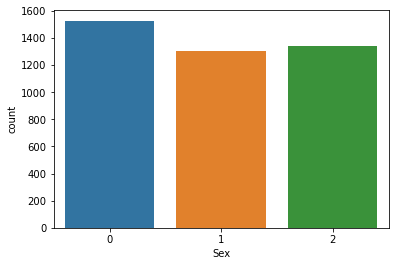

In [13]:
sns.countplot(df["Sex"])

# Pair plot

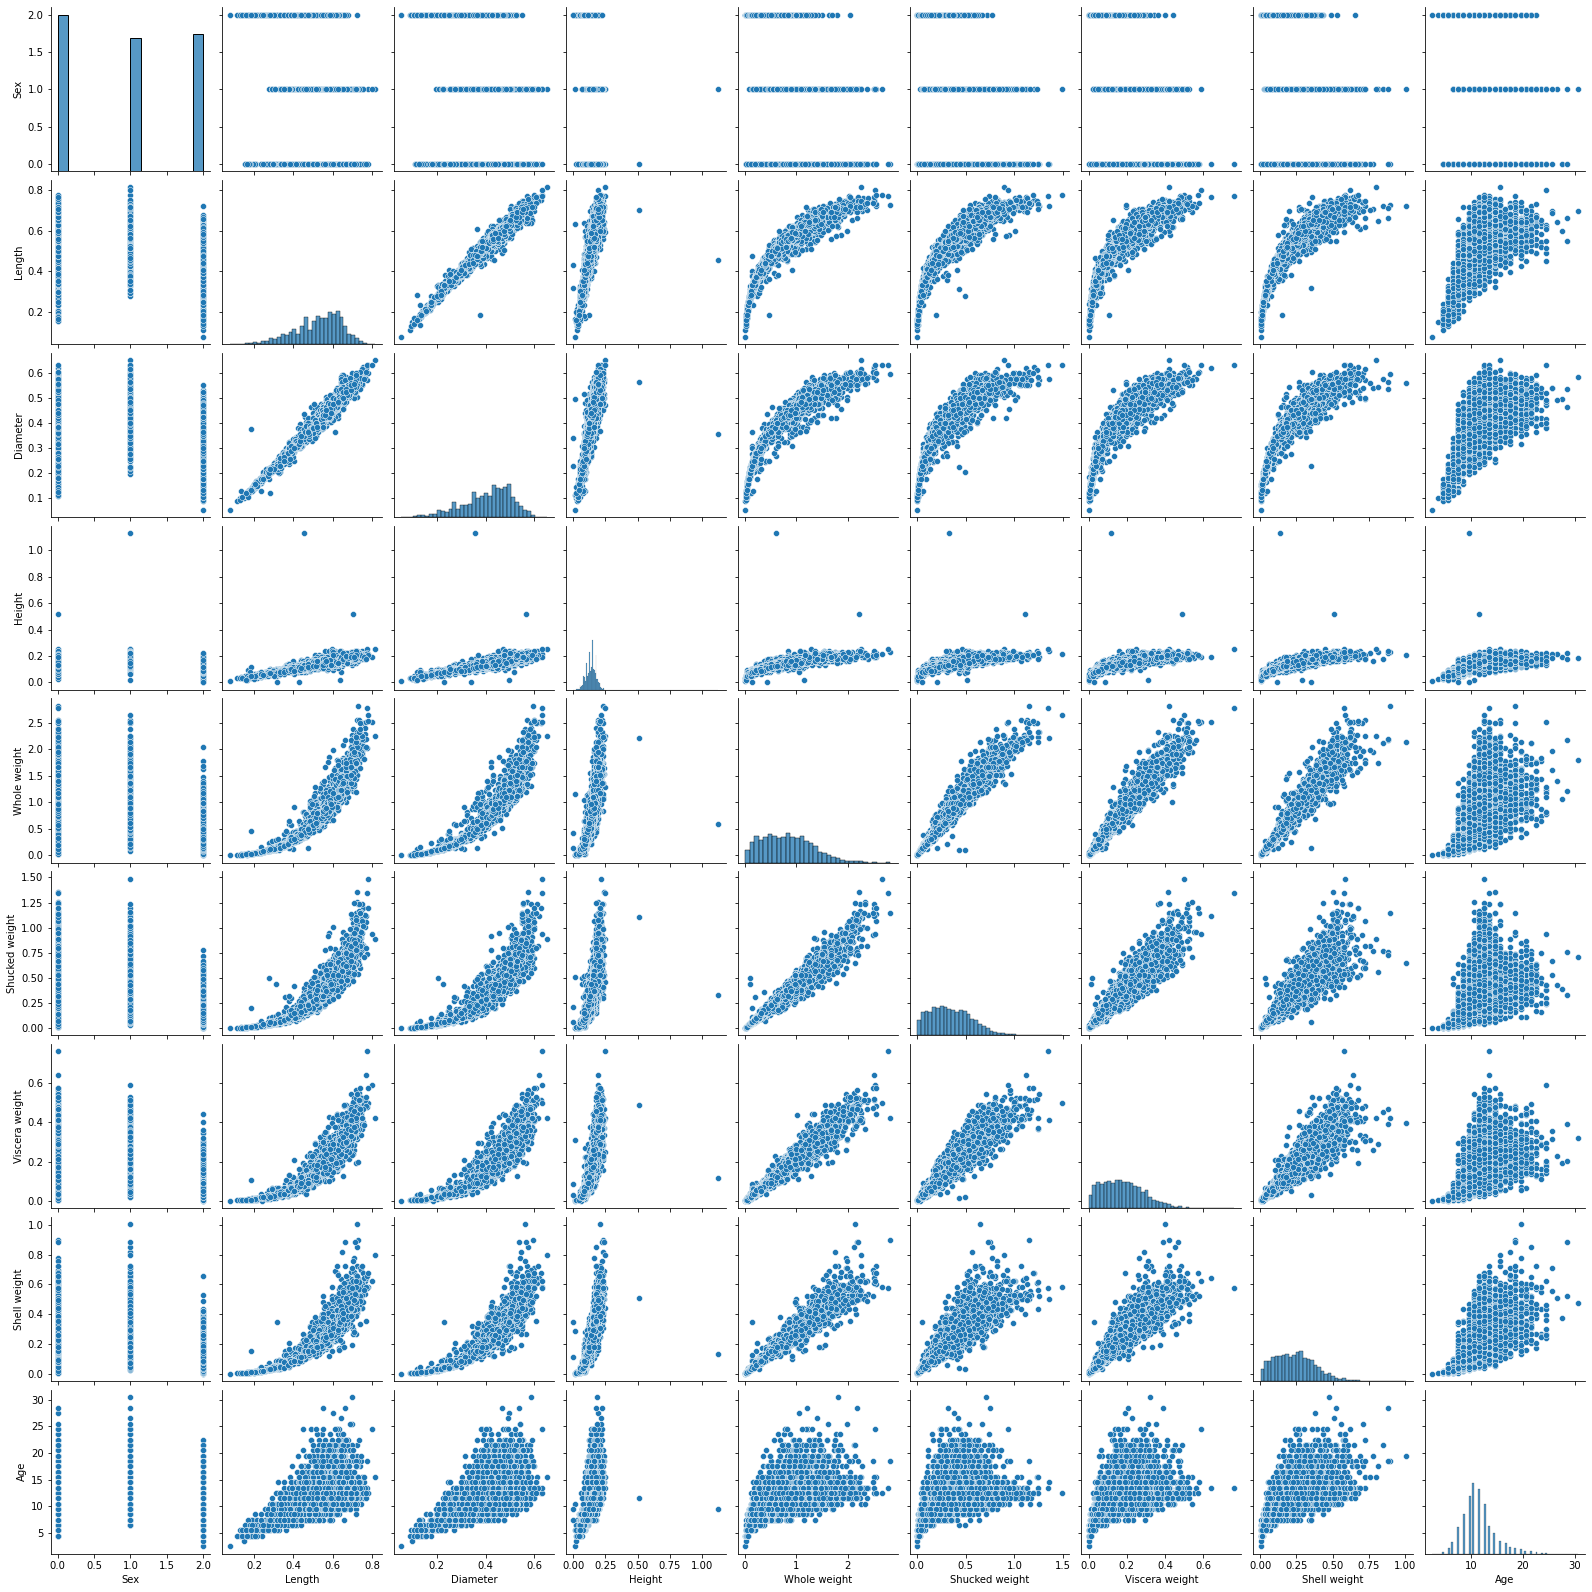

In [14]:
sns.pairplot(df)

# Scatter plot

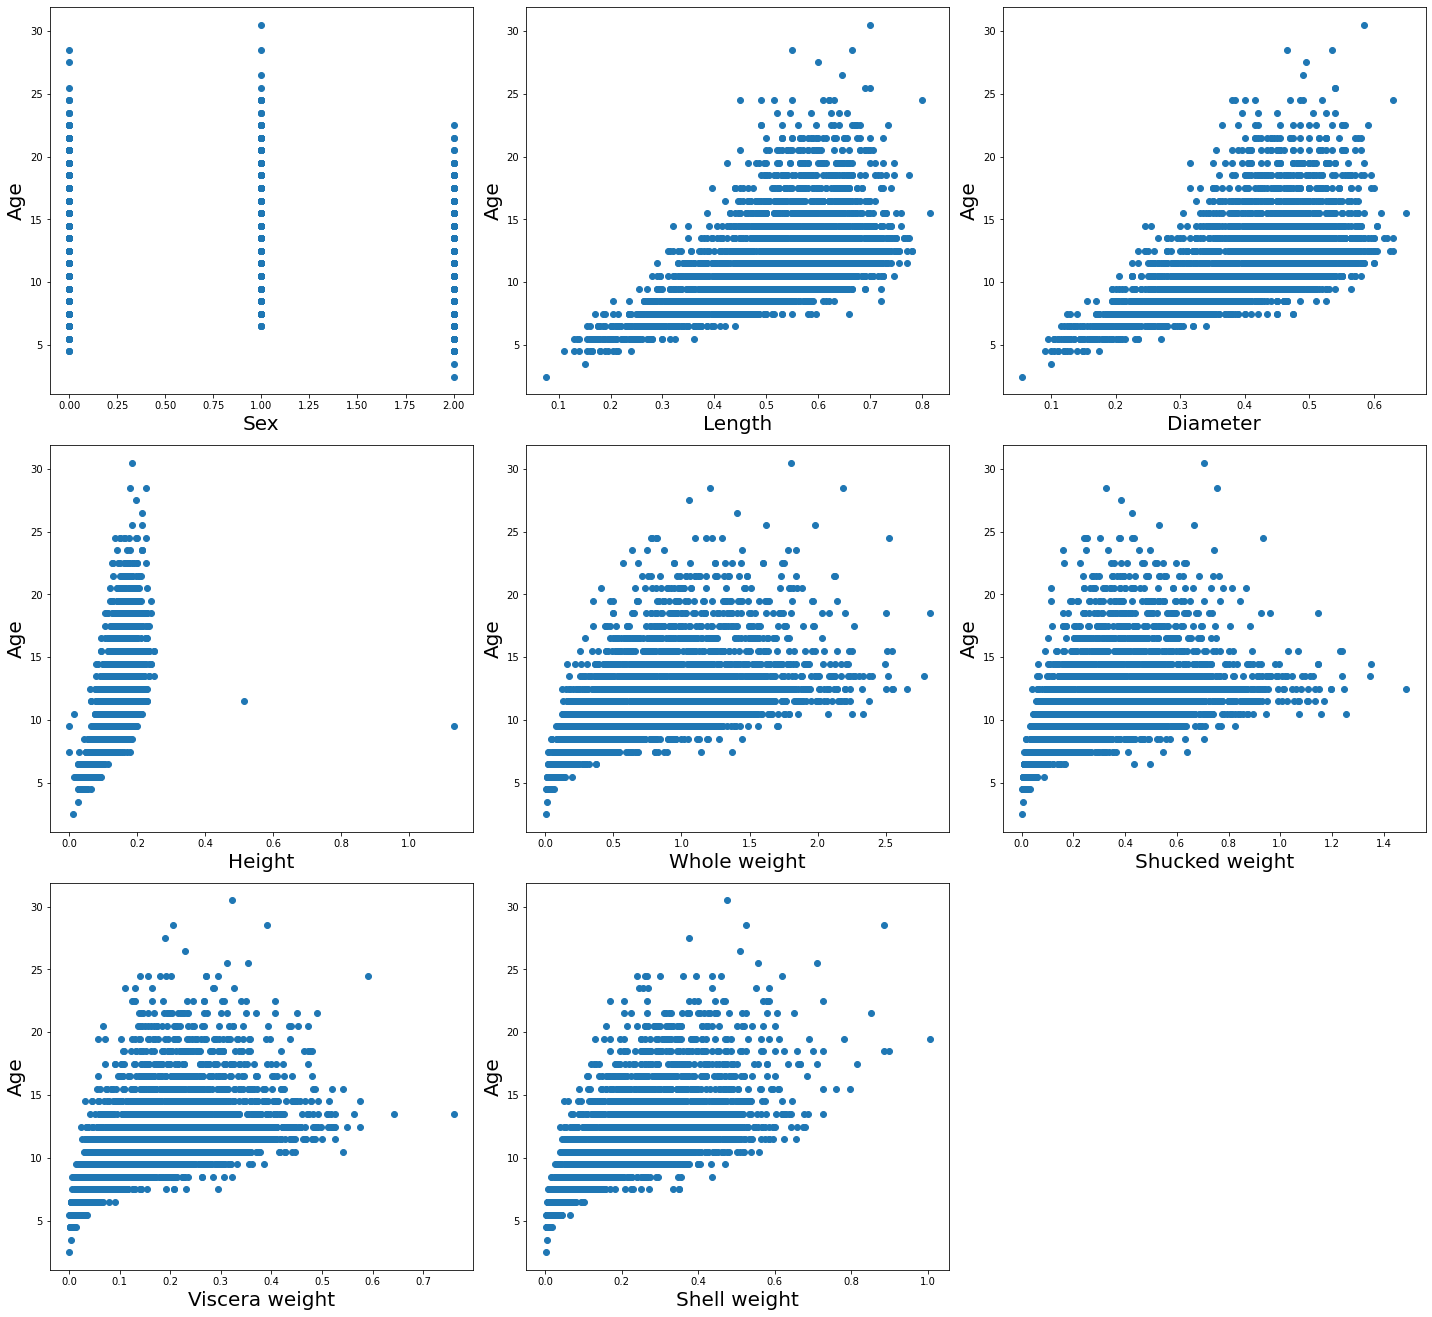

In [15]:
X=df.drop(columns='Age')
Y=df[['Age']]
plt.figure(figsize=(20,30))
plotnumber=1

for column in X:
    if plotnumber<=10:
        ax=plt.subplot(5,3,plotnumber)
        plt.scatter(X[column],Y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Age',fontsize=20)
    plotnumber+=1
plt.tight_layout()

# BOX PLOT and DIST PLOT

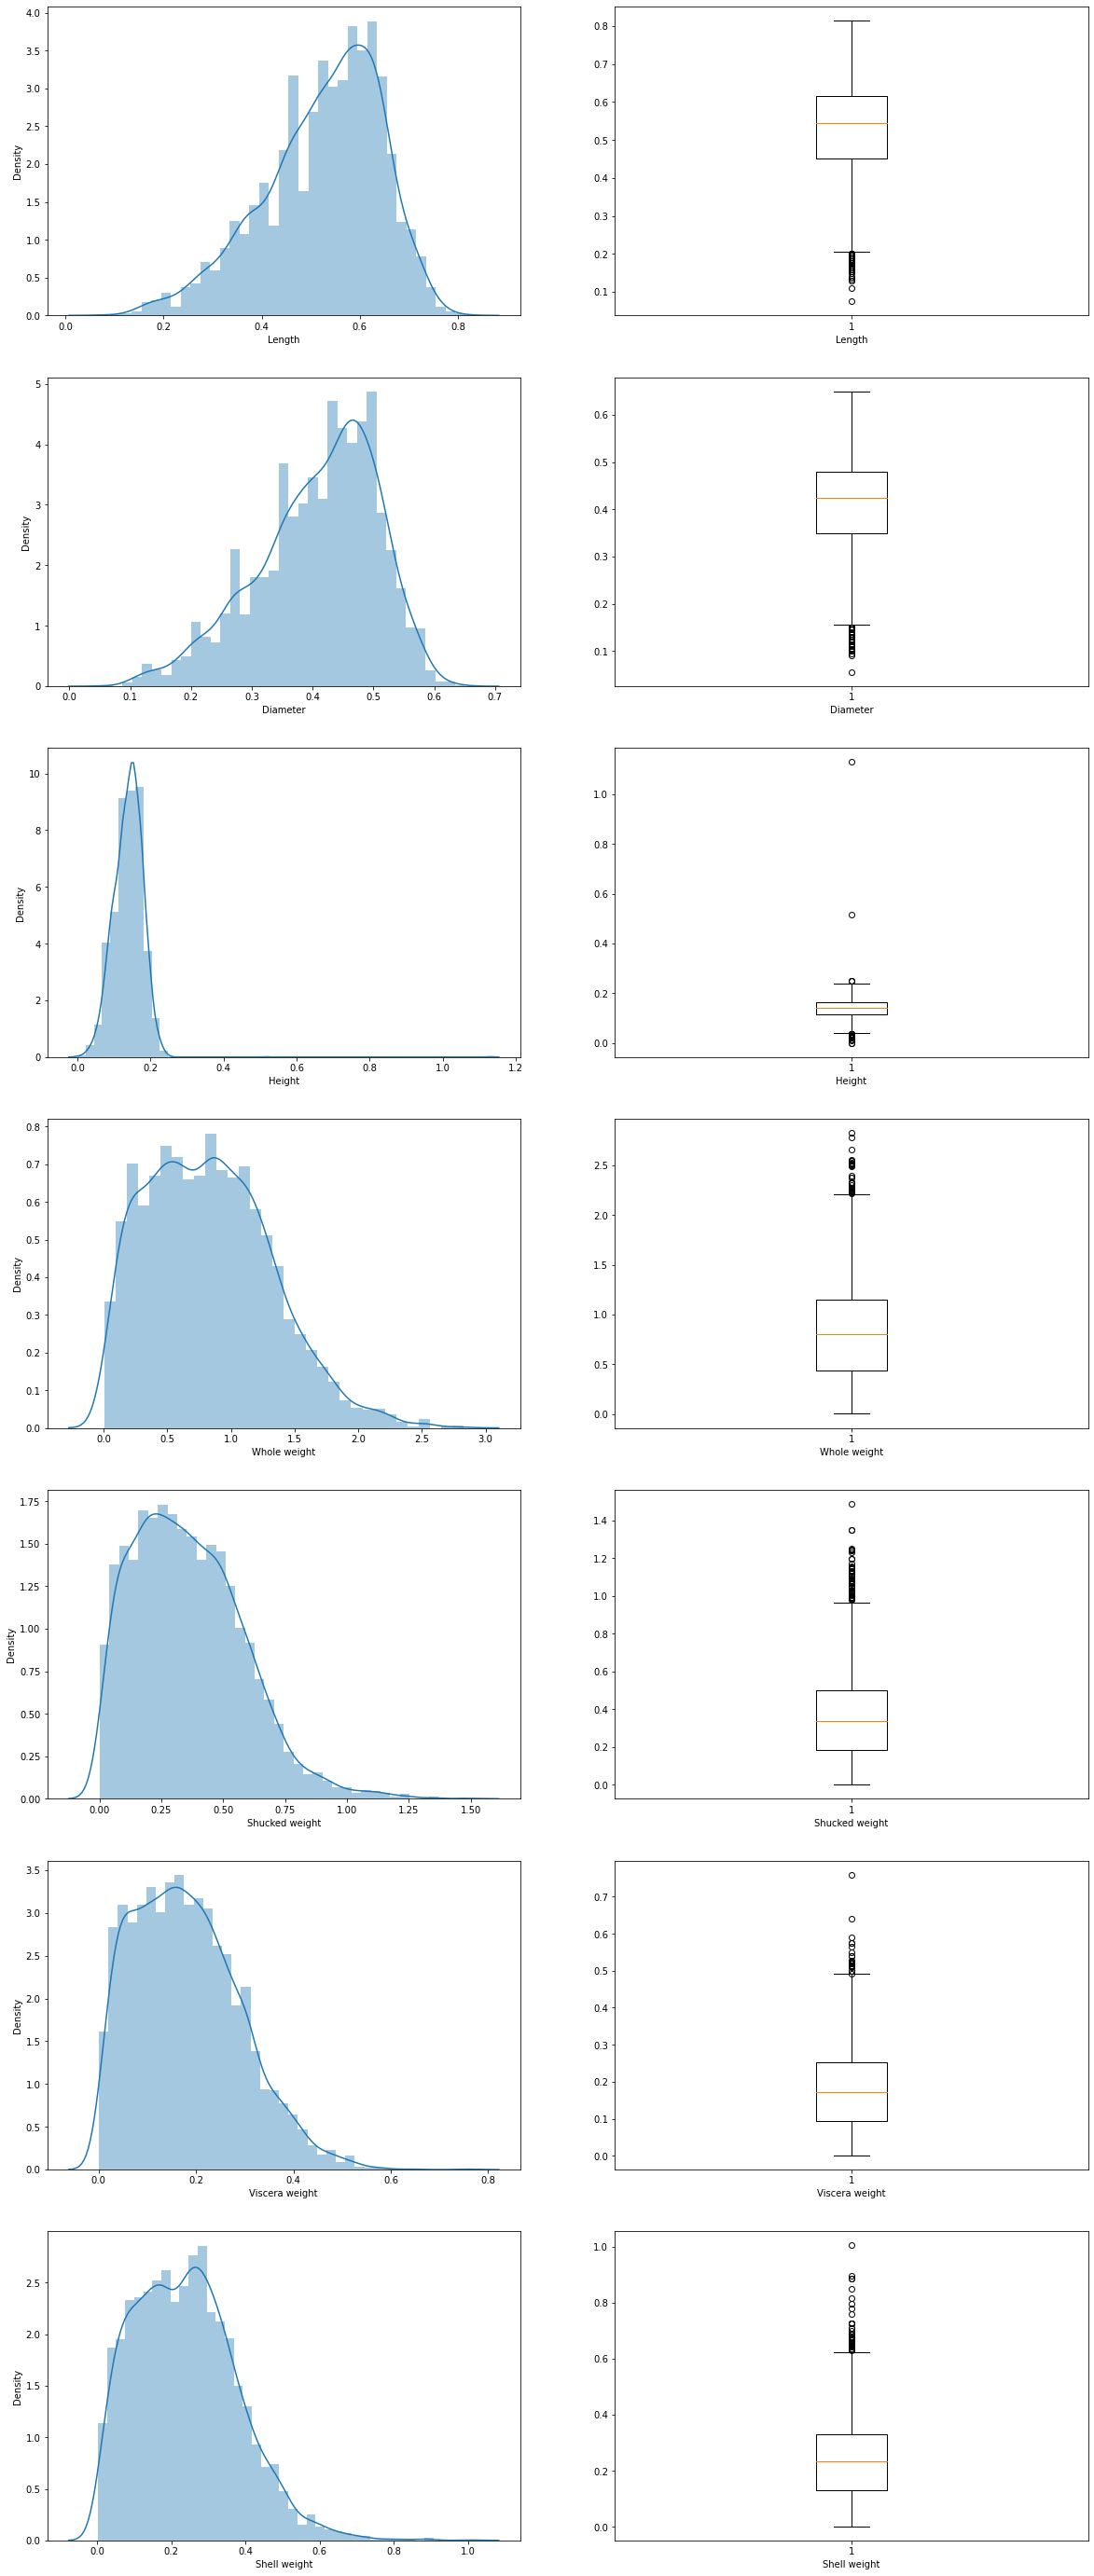

In [16]:
heart_NUM = ['Length','Diameter','Height','Whole weight','Shucked weight',
       'Viscera weight','Shell weight']

#  plot Numerical Data
a = 7  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(20,50))

for i in heart_NUM:
    plt.subplot(a, b, c)
    plt.xlabel(i)
    sns.distplot(df[i])
    c = c + 1

    plt.subplot(a, b, c)
    plt.xlabel(i)
    plt.boxplot(x = df[i])
    c = c + 1

    

plt.show()

In [17]:
df.skew()

Sex               0.083056
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Age               1.114102
dtype: float64

In [18]:
# Removing outliers using zscore
from scipy.stats import zscore
z_score=zscore(df[["Height"]])
abs_z_score=np.abs(z_score)
filtering_entry=(abs_z_score<3).all(axis=1)
df=df[filtering_entry]

In [19]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,16.5
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,8.5
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,10.5
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,11.5
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,8.5
...,...,...,...,...,...,...,...,...,...
4172,1,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,12.5
4173,0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,11.5
4174,0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,10.5
4175,1,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,11.5


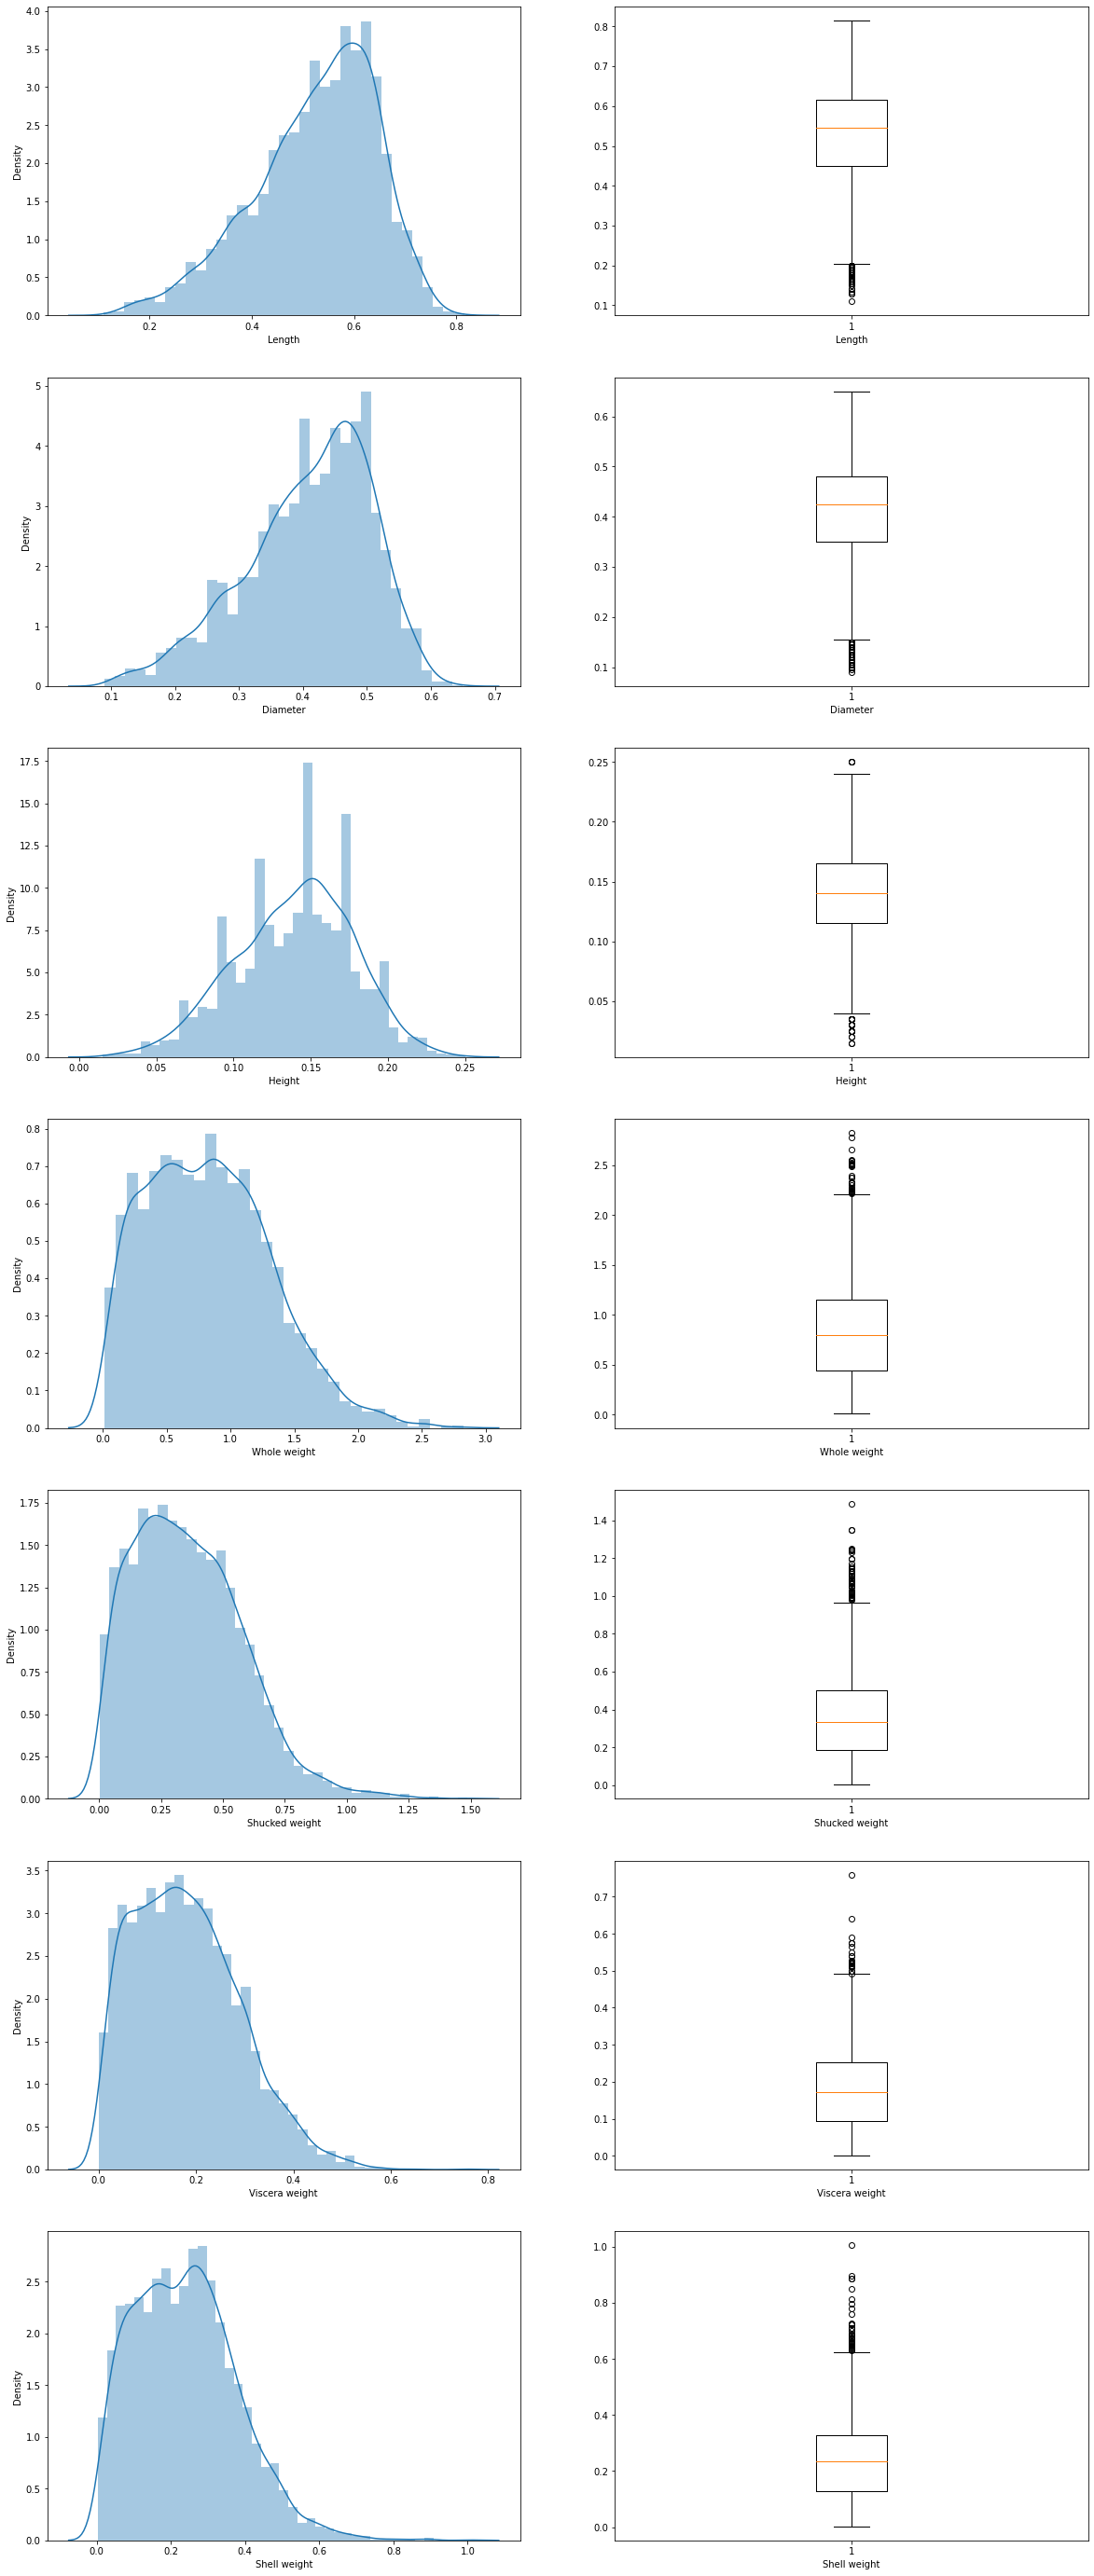

In [20]:
heart_NUM = ['Length','Diameter','Height','Whole weight','Shucked weight',
       'Viscera weight','Shell weight']

#  plot Numerical Data
a = 7  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(20,50))

for i in heart_NUM:
    plt.subplot(a, b, c)
    plt.xlabel(i)
    sns.distplot(df[i])
    c = c + 1

    plt.subplot(a, b, c)
    plt.xlabel(i)
    plt.boxplot(x = df[i])
    c = c + 1

    

plt.show()

In [21]:
df.skew()

Sex               0.084043
Length           -0.634795
Diameter         -0.605245
Height           -0.243534
Whole weight      0.528738
Shucked weight    0.715074
Viscera weight    0.589845
Shell weight      0.621616
Age               1.119334
dtype: float64

In [22]:
# All the features are under skewness limit -1 to +1 ,hence skewness is removed

In [23]:
# To find corelation using Heatmap and VIF technique
df_corr=df.corr().abs()
df_corr

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
Sex,1.000000,0.447862,0.457360,0.451068,0.460360,0.440068,0.453768,0.445249,0.351093
Length,0.447862,1.000000,0.986756,0.900583,0.925684,0.898469,0.903367,0.898655,0.555530
Diameter,0.457360,0.986756,1.000000,0.906923,0.925781,0.893588,0.899971,0.906263,0.573586
Height,0.451068,0.900583,0.906923,1.000000,0.889000,0.837582,0.866889,0.892005,0.609258
Whole weight,0.460360,0.925684,0.925781,0.889000,1.000000,0.969350,0.966267,0.955924,0.540181
Shucked weight,0.440068,0.898469,0.893588,0.837582,0.969350,1.000000,0.931788,0.883118,0.420601
Viscera weight,0.453768,0.903367,0.899971,0.866889,0.966267,0.931788,1.000000,0.908072,0.503512
Shell weight,0.445249,0.898655,0.906263,0.892005,0.955924,0.883118,0.908072,1.000000,0.627833
Age,0.351093,0.555530,0.573586,0.609258,0.540181,0.420601,0.503512,0.627833,1.000000


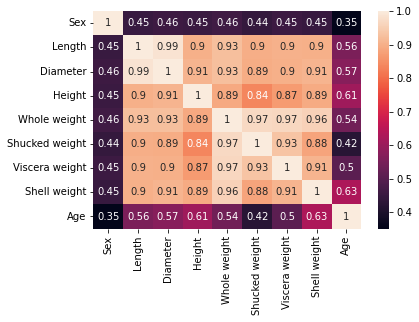

In [24]:
sns.heatmap(df_corr,annot=True)
plt.show()

In [25]:
X=df.drop(columns='Age')
Y=df[['Age']]
scalar=StandardScaler()
X_scaled=scalar.fit_transform(X)

vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"]=X.columns
vif

,vif,Features
0,1.290805,Sex
1,40.853227,Length
2,42.481289,Diameter
3,6.829938,Height
4,111.044168,Whole weight
5,28.649054,Shucked weight
6,17.436019,Viscera weight
7,22.249516,Shell weight


In [26]:
# Let us apply Select K Best to find best features
from sklearn.feature_selection import SelectKBest,f_classif

In [27]:
X=df.drop(columns='Age')
Y=df[['Age']]

In [28]:
best_features=SelectKBest(score_func=f_classif,k=6)
fit=best_features.fit(X,Y)
df_scores=pd.DataFrame(fit.scores_)
df_columns=pd.DataFrame(X.columns)

In [29]:
feature_scores=pd.concat([df_columns,df_scores],axis=1)
feature_scores.columns=['Feature_Name','Score']
print(feature_scores.nlargest(6,'Score'))

     Feature_Name       Score
2        Diameter  202.506713
1          Length  194.200096
3          Height  180.102703
7    Shell weight  153.102859
4    Whole weight  117.789679
6  Viscera weight  107.399226


In [30]:
# Taking 6 best featues as X
X=df.drop(columns=['Age','Sex','Shucked weight'])
Y=df[['Age']]

# Linear Regression Without Hyperparameter Tuning

In [31]:
sm=smf.ols(formula='Y~X',data=df).fit()

In [32]:
sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     614.4
Date:                Mon, 21 Mar 2022   Prob (F-statistic):               0.00
Time:                        13:36:09   Log-Likelihood:                -9478.5
No. Observations:                4172   AIC:                         1.897e+04
Df Residuals:                    4165   BIC:                         1.902e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.8540      0.289     16.797      0.000       4.287       5.421
X[0]          -5.9357      1.930     -3.076      0.002      -9.719      -2.152
X[1]          11.6438      2.387      4.879      0.000       6.965      16.323
X[2]          28.8695      2.469     11.693      0.000      24.029      33.710
X[3]          -5.5101      0.436    -12.635      0.000      -6.365      -4.655
X[4]          -2.0388      1.335     -1.527      0.127      -4.657       0.579
X[5]          24.5294      0.973     25.200      0.000      22.621      26.438
==============================================================================
Omnibus:                     1180.521   Durbin-Watson:                   1.253
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3722.901
Skew:                           1.435   Prob(JB):                         0.00
Kurtosis:                       6.630   Cond. No.                         128.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
scaler=StandardScaler() #Scaling
X_scaled=scaler.fit_transform(X)

In [34]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.25,random_state=21) #Training Test split

In [35]:
lm=LinearRegression() # Applying Regression
lm.fit(X_train,Y_train) # Fitting the model

LinearRegression()

In [36]:
Y_pred=lm.predict(X_test) # Predicting the Test data
Y_pred_train=lm.predict(X_train) #Predicting the Train data

In [37]:
lm.score(X_train,Y_train)

0.46839128854027645

In [38]:
lm.score(X_test,Y_test)

0.4720081478763479

In [39]:
r2=r2_score(Y_test,Y_pred) #r2_score
r2

0.4720081478763479

In [40]:
cross_scores = cross_val_score(lm, X_train, Y_train, scoring='r2', cv=5)
cross_scores   

array([0.49816616, 0.42694783, 0.43413349, 0.51728107, 0.44943149])

In [41]:
cross_scores.mean()

0.4651920103304191

In [42]:
mean_absolute_error(Y_test,Y_pred) #MAE

1.6609377963673493

In [43]:
mean_squared_error(Y_test,Y_pred) #MSE

5.169037460919274

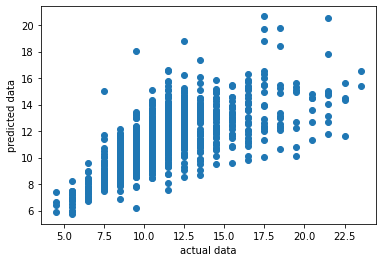

In [44]:
plt.scatter(Y_test,Y_pred) # Relation between actual and predicted data
plt.xlabel('actual data')
plt.ylabel('predicted data')
plt.show()

In [45]:
# R-squared:	0.4720081478763479
# mean_absolute_error= 1.6609377963673493
# mean_squared_error= 5.169037460919274

# Linear Regression Using Ridge Regression

In [46]:
ridge=Ridge()

In [47]:
parameters={
    'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]
}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='r2',cv=5)

In [48]:
ridge_regressor.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='r2')

In [49]:
print(ridge_regressor.best_params_)

{'alpha': 0.01}


In [50]:
print(ridge_regressor.best_score_)

0.4651921062259327


In [51]:
Y_pred=ridge_regressor.predict(X_test)
Y_pred_train=ridge_regressor.predict(X_train)

In [52]:
ridge_regressor.score(X_train,Y_train)

0.4683912878597444

In [53]:
ridge_regressor.score(X_test,Y_test)

0.4720086846337508

In [54]:
r2=r2_score(Y_test,Y_pred)
r2

0.4720086846337508

In [55]:
cross_scores = cross_val_score(ridge_regressor, X_train, Y_train, scoring='r2', cv=5)
cross_scores   

array([0.49814482, 0.42699265, 0.43420354, 0.51714236, 0.44947353])

In [56]:
cross_scores.mean()

0.46519137973330915

In [57]:
mean_absolute_error(Y_test,Y_pred)

1.660939698186575

In [58]:
mean_squared_error(Y_test,Y_pred)

5.169032206067118

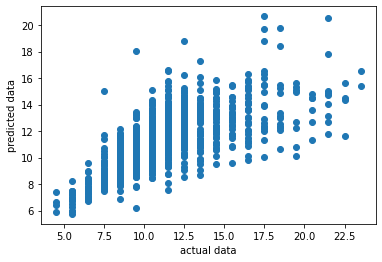

In [59]:
plt.scatter(Y_test,Y_pred)
plt.xlabel('actual data')
plt.ylabel('predicted data')
plt.show()

In [60]:
# R-squared:	0.4720086846337508
# mean_absolute_error= 1.660939698186575
# mean_squared_error= 5.169032206067118

# KNN

In [61]:
scaler=StandardScaler()

In [62]:
X_scaled=scaler.fit_transform(X)

In [63]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.25,random_state=21)

In [64]:
knn=KNeighborsRegressor()

In [65]:
knn.fit(X_train,Y_train)

KNeighborsRegressor()

In [66]:
Y_pred=knn.predict(X_test)

In [67]:
knn.score(X_train,Y_train)

0.6243436310571439

In [68]:
knn.score(X_test,Y_test)

0.4250611697462806

In [69]:
r2=r2_score(Y_test,Y_pred)
r2

0.4250611697462806

In [70]:
cross_scores = cross_val_score(knn, X_train, Y_train, scoring='r2', cv=5)
cross_scores 

array([0.45061133, 0.37211514, 0.4097328 , 0.49774108, 0.42748299])

In [71]:
cross_scores.mean()

0.4315366688870942

In [72]:
mean_absolute_error(Y_test,Y_pred)

1.6903163950143816

In [73]:
mean_squared_error(Y_test,Y_pred)

5.628648130393097

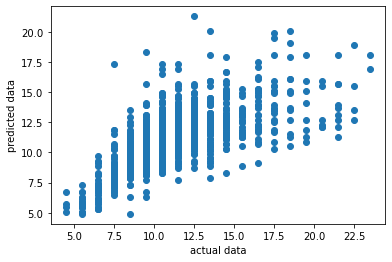

In [74]:
plt.scatter(Y_test,Y_pred)
plt.xlabel('actual data')
plt.ylabel('predicted data')
plt.show()

In [75]:
# R-squared:	0.4250611697462806
# mean_absolute_error=1.6903163950143816
# mean_squared_error= 5.628648130393097

# KNN MODEL USING HYPERPARAMETER TUNING

In [76]:
knn=KNeighborsRegressor()

In [77]:
param_grid=[
    {'algorithm':['kd_tree','brute','ball_tree'],
    'leaf_size':[15,18,20],
    'n_neighbors':[3,5,7,13]
    }
]

In [78]:
clf=GridSearchCV(knn,param_grid,cv=3,n_jobs=-1)

In [79]:
clf.fit(X_train,Y_train)

GridSearchCV(cv=3, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid=[{'algorithm': ['kd_tree', 'brute', 'ball_tree'],
                          'leaf_size': [15, 18, 20],
                          'n_neighbors': [3, 5, 7, 13]}])

In [80]:
clf.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 15, 'n_neighbors': 13}

In [81]:
Y_pred=clf.predict(X_test)
Y_pred_train=clf.predict(X_train)

In [82]:
clf.score(X_train,Y_train)

0.5565657562921897

In [83]:
clf.score(X_test,Y_test)

0.4843378144227225

In [84]:
r2=r2_score(Y_test,Y_pred)
r2

0.4843378144227225

In [85]:
cross_scores = cross_val_score(clf, X_train, Y_train, scoring='r2', cv=5)
cross_scores 

array([0.49626533, 0.43725129, 0.44811324, 0.54251857, 0.47502996])

In [86]:
cross_scores.mean()

0.4798356755018041

In [87]:
mean_absolute_error(Y_test,Y_pred)

1.595987904712737

In [88]:
mean_squared_error(Y_test,Y_pred)

5.048330090147332

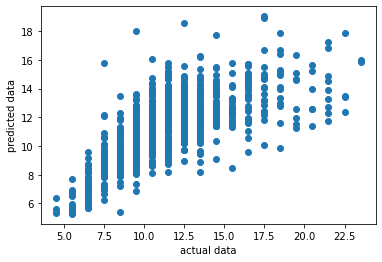

In [89]:
plt.scatter(Y_test,Y_pred)
plt.xlabel('actual data')
plt.ylabel('predicted data')
plt.show()

In [90]:
# R-squared:	0.4843378144227225
# mean_absolute_error= 1.595987904712737
# mean_squared_error= 5.048330090147332

# DECISION TREE MODEL

In [91]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=21)
dt=DecisionTreeRegressor()
dt.fit(X_train,Y_train)

DecisionTreeRegressor()

In [92]:
Y_pred=dt.predict(X_test)

In [93]:
dt.score(X_train,Y_train)

1.0

In [94]:
dt.score(X_test,Y_test)

0.005578760484941103

In [95]:
r2=r2_score(Y_test,Y_pred)
r2

0.005578760484941103

In [96]:
cross_scores = cross_val_score(dt, X_train, Y_train, scoring='r2', cv=5)
cross_scores 

array([ 0.08211766,  0.00720747,  0.05130162,  0.0005898 , -0.00852235])

In [97]:
cross_scores.mean()

0.026538839713207873

In [98]:
mean_absolute_error(Y_test,Y_pred)

2.2013422818791946

In [99]:
mean_squared_error(Y_test,Y_pred)

9.735378715244487

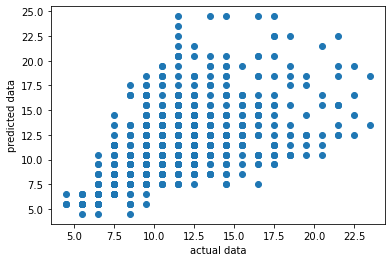

In [100]:
plt.scatter(Y_test,Y_pred)
plt.xlabel('actual data')
plt.ylabel('predicted data')
plt.show()

In [101]:
# R-squared:	0.005578760484941103
# mean_absolute_error= 2.2013422818791946
# mean_squared_error= 9.735378715244487

# DECISION TREE WITH HYPER PARAMETER TUNING

In [102]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=21)

In [103]:
dt1=DecisionTreeRegressor()

In [104]:
param_grid = {
               'max_depth': range(3,12,2),
               'min_samples_split': range(4,10,2),
               'min_samples_leaf': range(3,10,2),
              'criterion':["mse", "friedman_mse", "mae", "poisson"]}

In [105]:
clf1=GridSearchCV(dt1,param_grid,cv=3,n_jobs=-1)

In [106]:
clf1.fit(X_train,Y_train)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae', 'poisson'],
                         'max_depth': range(3, 12, 2),
                         'min_samples_leaf': range(3, 10, 2),
                         'min_samples_split': range(4, 10, 2)})

In [107]:
clf1.best_params_

{'criterion': 'mse',
 'max_depth': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 4}

In [108]:
Y_pred=clf1.predict(X_test)

In [109]:
clf1.score(X_train,Y_train)


0.5103247424849616

In [110]:
clf1.score(X_test,Y_test)

0.4278501945064852

In [111]:
r2=r2_score(Y_test,Y_pred)
r2

0.4278501945064852

In [112]:
cross_scores = cross_val_score(clf1, X_train, Y_train, scoring='r2', cv=5)
cross_scores 

array([0.4343984 , 0.36309747, 0.40835929, 0.48232383, 0.394815  ])

In [113]:
cross_scores.mean()

0.41659879628829477

In [114]:
mean_absolute_error(Y_test,Y_pred)

1.680740736518389

In [115]:
mean_squared_error(Y_test,Y_pred)

5.60134359262998

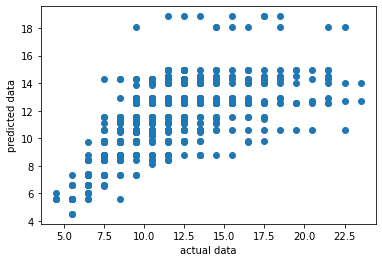

In [116]:
plt.scatter(Y_test,Y_pred)
plt.xlabel('actual data')
plt.ylabel('predicted data')
plt.show()

In [117]:
# R-squared:	0.4278501945064852
# mean_absolute_error= 1.680740736518389
# mean_squared_error= 5.60134359262998

# GRADIENT BOOSTING

In [118]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=21)

In [119]:
gbdt=GradientBoostingRegressor()

In [120]:
gbdt.fit(X_train,Y_train)

GradientBoostingRegressor()

In [121]:
Y_pred=gbdt.predict(X_test)

In [122]:
gbdt.score(X_train,Y_train)

0.610890108840423

In [123]:
gbdt.score(X_test,Y_test)

0.4815986376936874

In [124]:
r2=r2_score(Y_test,Y_pred)
r2

0.4815986376936874

In [125]:
cross_scores = cross_val_score(gbdt, X_train, Y_train, scoring='r2', cv=5)
cross_scores 

array([0.49791989, 0.42592248, 0.45925193, 0.54362568, 0.47846875])

In [126]:
cross_scores.mean()

0.48103774704841556

In [127]:
mean_absolute_error(Y_test,Y_pred)

1.5975356074493152

In [128]:
mean_squared_error(Y_test,Y_pred)

5.075146615946949

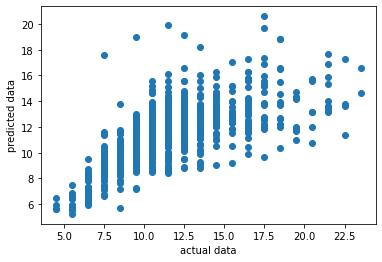

In [129]:
plt.scatter(Y_test,Y_pred)
plt.xlabel('actual data')
plt.ylabel('predicted data')
plt.show()

In [130]:
# R-squared:	0.4815986376936874
# mean_absolute_error=1.5975356074493152
# mean_squared_error= 5.075146615946949

# GBDT WITH HYPER PARAMETER

In [131]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=21)

In [132]:
gbdt1=GradientBoostingRegressor()

In [133]:
param_grid = {
               'max_depth': range(3,12,2),
               'min_samples_split': range(4,10,2),
               'min_samples_leaf': range(3,10,2),
              'criterion':['friedman_mse', 'squared_error', 'mse', 'mae']}

In [134]:
clf1=GridSearchCV(gbdt1,param_grid,cv=3,n_jobs=-1)

In [135]:
clf1.fit(X_train,Y_train)

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'squared_error', 'mse',
                                       'mae'],
                         'max_depth': range(3, 12, 2),
                         'min_samples_leaf': range(3, 10, 2),
                         'min_samples_split': range(4, 10, 2)})

In [136]:
clf1.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 3,
 'min_samples_leaf': 7,
 'min_samples_split': 4}

In [137]:
Y_pred=clf1.predict(X_test)

In [138]:
clf1.score(X_train,Y_train)


0.5972663570389353

In [139]:
clf1.score(X_test,Y_test)

0.48158573152545314

In [140]:
r2=r2_score(Y_test,Y_pred)
r2

0.48158573152545314

In [127]:
mean_absolute_error(Y_test,Y_pred)

1.5975356074493152

In [128]:
mean_squared_error(Y_test,Y_pred)

5.075146615946949

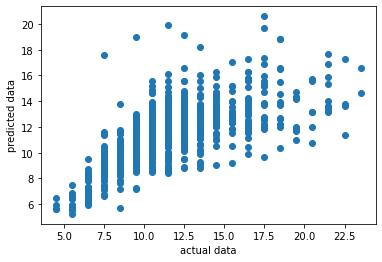

In [129]:
plt.scatter(Y_test,Y_pred)
plt.xlabel('actual data')
plt.ylabel('predicted data')
plt.show()

In [ ]:
# R-squared:	0.48158573152545314
# mean_absolute_error= 1.5975356074493152
# mean_squared_error= 5.075146615946949

# Conclusion

In [ ]:
# 1. 4 models were fitted on the dataset mainly Linear regression,KNN, Decision tree & GBDT without and with Hypertparameter Tuning
# 2. Among the models the optimized Result was achieved using KNN with hyperparameter tuning
# 3. Result:
    # Model: KNN with Hyperparameter tuning
    # R-squared:	0.4843378144227225
    # mean_absolute_error= 1.595987904712737
    # mean_squared_error= 5.048330090147332
        

In [ ]:
md=[lm,knn,dt,gbdt] # Saving
import pickle
filename="Abalone.pkl"
pickle.dump(md,open(filename,"wb"))